In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Importing Data file
data = pd.read_csv("C:\\Users\\kalpana\\Downloads\\forestfires (3).csv")
df = pd.DataFrame(data)
df.columns
print(df.to_numpy())

[['mar' 'fri' 86.2 ... 0.0 0.0 'small']
 ['oct' 'tue' 90.6 ... 0.0 0.0 'small']
 ['oct' 'sat' 90.6 ... 0.0 0.0 'small']
 ...
 ['aug' 'sun' 81.6 ... 0.0 11.16 'large']
 ['aug' 'sat' 94.4 ... 0.0 0.0 'small']
 ['nov' 'tue' 79.5 ... 0.0 0.0 'small']]


In [2]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


C:\Users\kalpana\AppData\Local\Temp\ipykernel_7276\3527911337.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='plasma')


<AxesSubplot:>

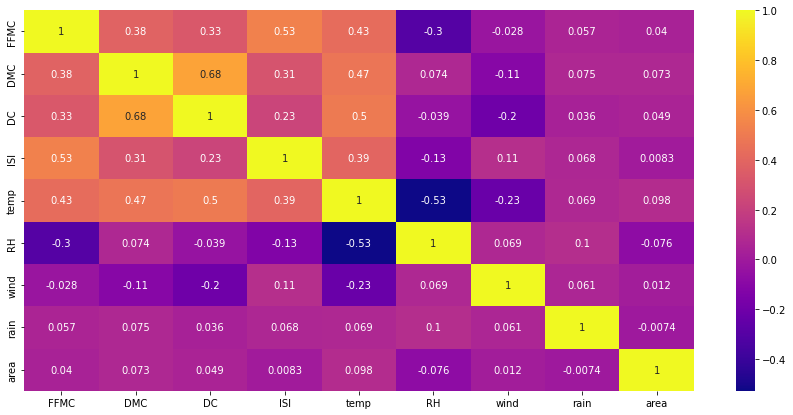

In [4]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

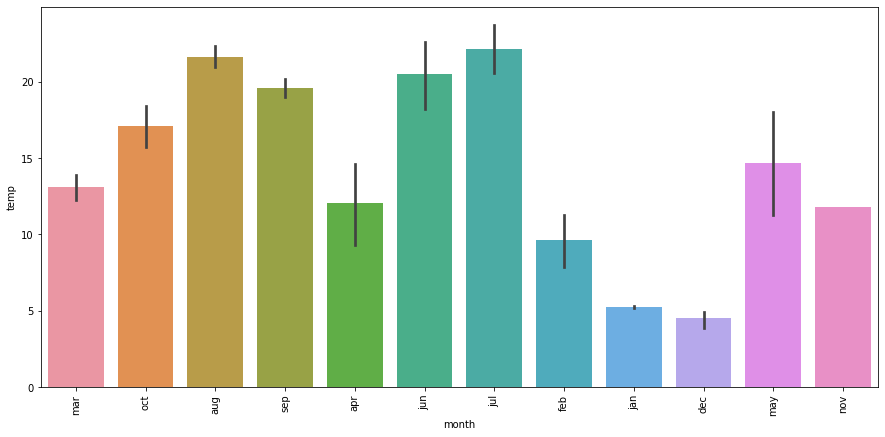

In [5]:

plt.figure(figsize=(15,7))
sns.barplot(x = df['month'],y = df['temp'])
plt.xticks(rotation = 'vertical')
plt.show()

In [6]:
import numpy as np
import pandas as pd
from plotnine import *


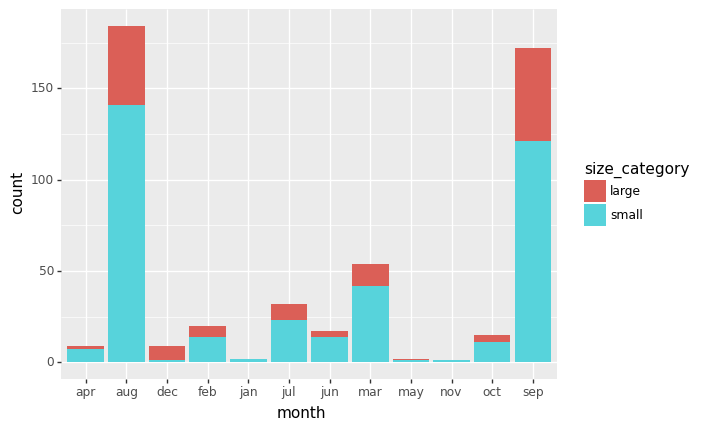

<ggplot: (181148380980)>

In [7]:
ggplot(df, aes(x='month', fill = 'size_category')) + \
    geom_bar(stat = 'count')

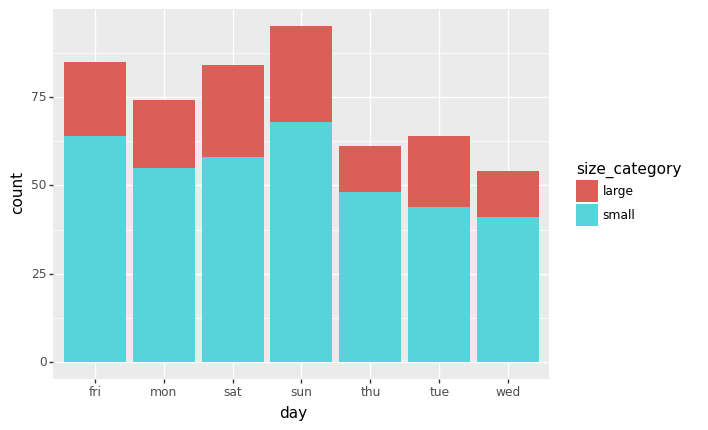

<ggplot: (181148536251)>

In [8]:
ggplot(df, aes(x='day', fill = 'size_category')) + \
    geom_bar(stat = 'count')

In [9]:
import category_encoders as ce

In [10]:
encoder = ce.OneHotEncoder(cols=['month', 'day'])

In [11]:
df1 = encoder.fit_transform(df)

C:\Users\kalpana\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
C:\Users\kalpana\anaconda3\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


In [12]:
df1.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,1,0,0,0,0,0,0,0,0,0,...,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,0,1,0,0,0,0,0,0,0,0,...,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,0,1,0,0,0,0,0,0,0,0,...,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,1,0,0,0,0,0,0,0,0,0,...,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,1,0,0,0,0,0,0,0,0,0,...,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [13]:
y=df1['size_category']
X=df1.drop(['size_category'],axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
y=le.fit_transform(y)

In [16]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
from sklearn.svm import SVC

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Feature Scaling
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)
 
# Mode performance
 
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))


Accuracy: 0.840


In [21]:
y_pred = svm.predict(X_test)

C:\Users\kalpana\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names


In [22]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': svm.predict(X)})

C:\Users\kalpana\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names


In [23]:
y_pred_df

,actual,predicted_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
512,0,1
513,0,0
514,0,1
515,1,1


In [24]:
y_pred_train = svm.predict(X_train)

y_pred_train

C:\Users\kalpana\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [25]:
from sklearn import metrics

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.39      0.55        46
           1       0.79      0.98      0.88       110

    accuracy                           0.81       156
   macro avg       0.85      0.69      0.71       156
weighted avg       0.83      0.81      0.78       156



In [27]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

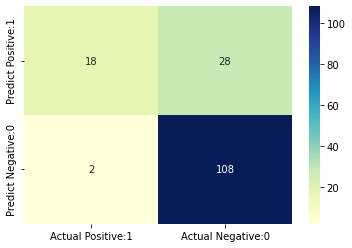

In [28]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [30]:
yhat = svm.predict(X_test)

C:\Users\kalpana\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names


In [31]:
fpr, tpr, thresholds = roc_curve(y_test, yhat)

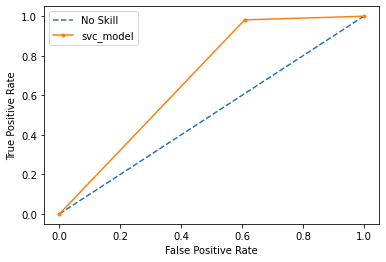

In [32]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='svc_model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#  SGDClassifier

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
from sklearn.linear_model import SGDClassifier
 
# Instantiate SVM classifier using SGDClassifier
svm1 = SGDClassifier(loss='hinge')
 
# Fit the model
svm1.fit(X_train_std, y_train)
 
# Model Performance
y_pred1 = svm1.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred1))

Accuracy: 0.917


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        46
           1       0.92      0.96      0.94       110

    accuracy                           0.92       156
   macro avg       0.91      0.88      0.90       156
weighted avg       0.92      0.92      0.92       156



In [36]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)

<AxesSubplot:>

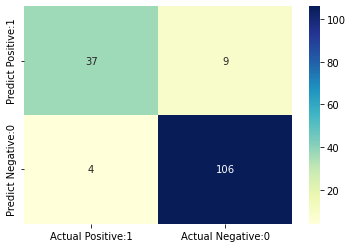

In [37]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [38]:
yhat1 = svm1.predict(X_test)

C:\Users\kalpana\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names


In [39]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, yhat1)

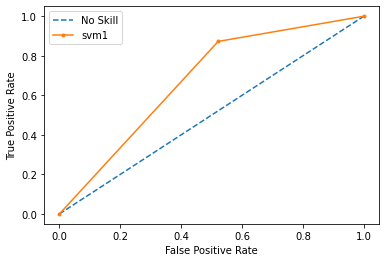

In [40]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr1, tpr1, marker='.', label='svm1')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [41]:
from matplotlib.colors import ListedColormap

In [42]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, svm1, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = svm1.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(X_test), :], y[list(y_test)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='X_test')

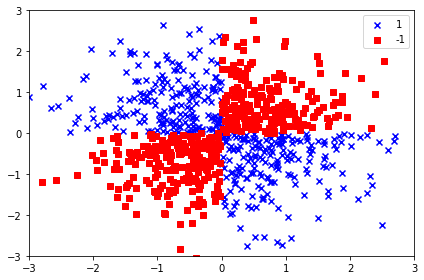

In [43]:
np.random.seed(0)
X_xor = np.random.randn(800, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [89]:
Accuracy=81
Accuracy1=92

In [90]:
d2={'Model Name':['svm','svm1'],'Score':[Accuracy,Accuracy1]}
table=pd.DataFrame(d2)
table

,Model Name,Score
0,svm,81
1,svm1,92


# Model Predictions

In [91]:
predicted = []
testtrain = np.array(X_train)
for i in range(len(testtrain)):
    predicted.append(svm.predict([testtrain[i]]))
    
predicted

[array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


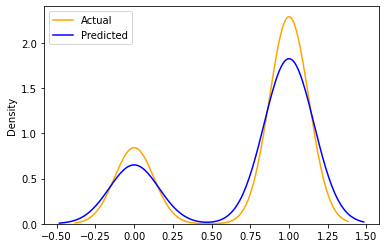

In [92]:
sns.distplot(y,hist=False,color='orange',label='Actual')
sns.distplot(y_pred1,hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [93]:
predicted = []
testtrain = np.array(X)
for i in range(len(testtrain)):
    predicted.append(svm1.predict([testtrain[i]]))
    
predicted

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),

In [94]:
y_pred2 = svm1.predict(X)

C:\Users\kalpana\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names


C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


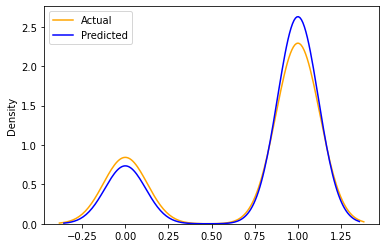

In [95]:
sns.distplot(y,hist=False,color='orange',label='Actual')
sns.distplot(y_pred2,hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [87]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [88]:
data = df.copy()
data['Predicted area'] = np.array(ans)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,Predicted area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,2.718282
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,2.718282
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,2.718282
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,1.000000
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,2.718282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,2.718282
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,1.000000
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,2.718282
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,2.718282


# Actual data

(-1.115898643281713,
 1.1007570782515101,
 -1.111058178370681,
 1.1190141830134557)

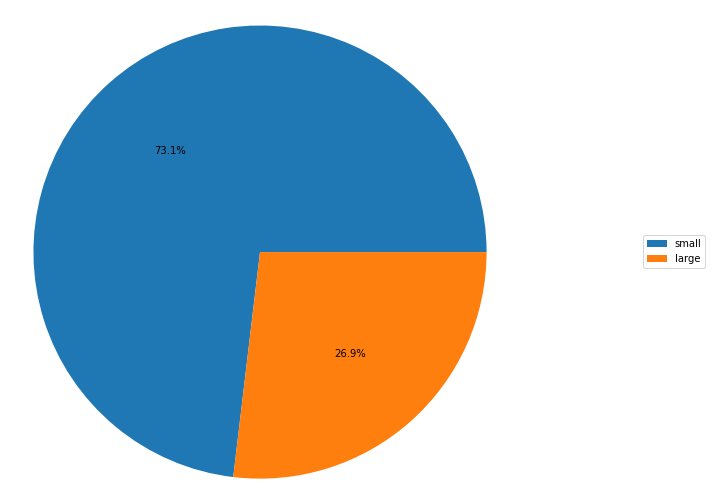

In [96]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df["size_category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

# predicted data

(-1.1050498600003997,
 1.1002404695238286,
 -1.1056260897728476,
 1.1034854730945038)

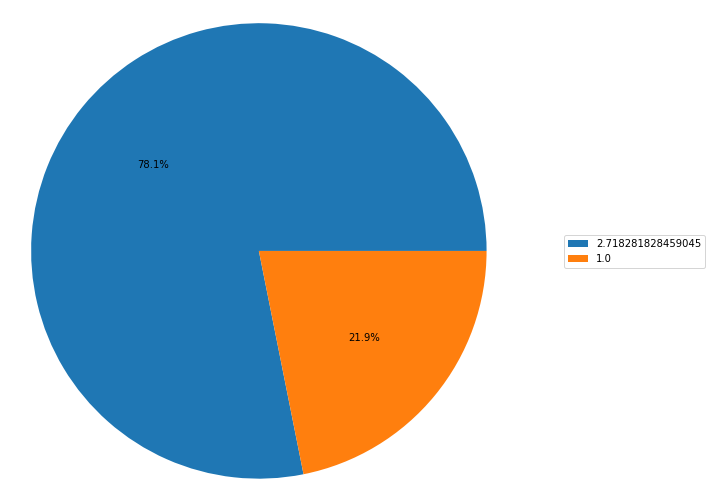

In [97]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = data["Predicted area"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")